In [15]:
import numpy as np
from sklearn import datasets


digits = datasets.load_digits()
print(digits.data.shape)
print(np.unique(digits.target))
print(digits.data)

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


ValueError: num must be 1 <= num <= 8, not 9

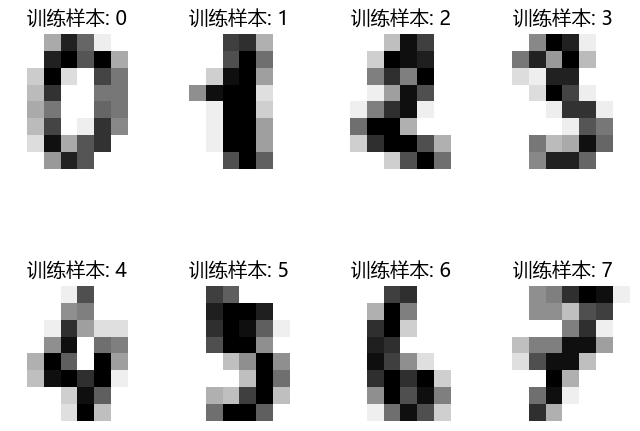

In [18]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

font_set = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc', size=14)

images_and_labels = list(zip(digits.images, digits.target))

plt.figure(figsize=(8, 6))

for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'训练样本: ' + str(label), fontproperties=font_set)
plt.show()

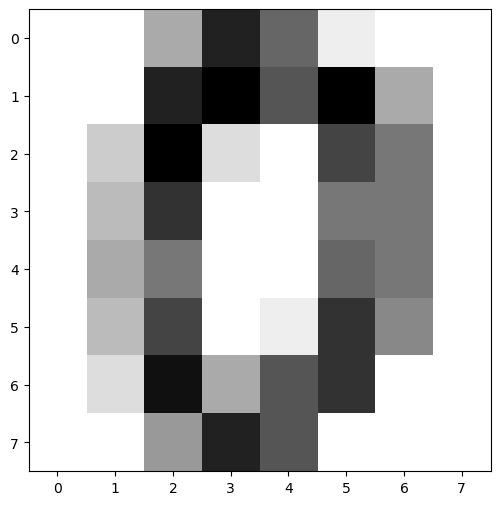

In [19]:
plt.figure(figsize=(8,6))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
# 使用PCA进行降维
from sklearn.decomposition import *

pca = PCA(n_components=2)

reduced_data_pca = pca.fit_transform(digits.data)

print(reduced_data_pca.shape)

(1797, 2)


[0 1 2 ... 8 9 8]


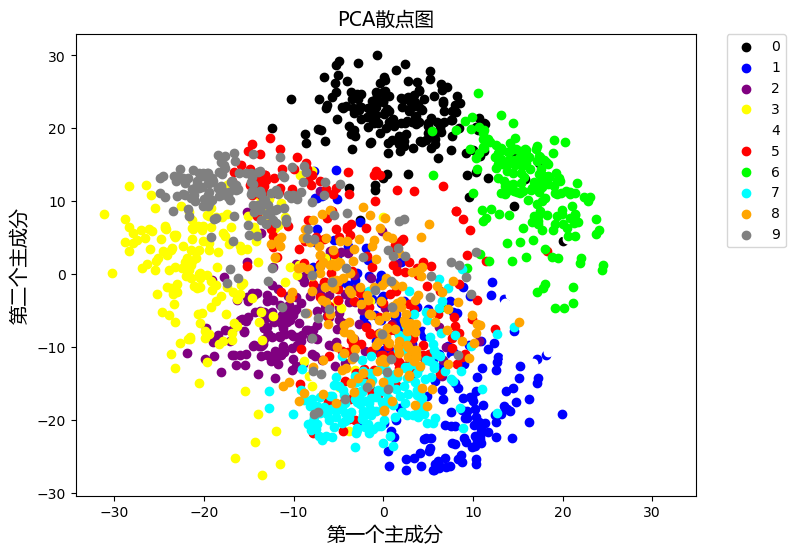

In [21]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
plt.figure(figsize=(8,6))
for i in range(len(colors)):
    x = reduced_data_pca[:,0][digits.target == i]
    y = reduced_data_pca[:,1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(u"第一个主成分", fontproperties=font_set)
plt.ylabel(u"第二个主成分", fontproperties=font_set)
plt.title(u"PCA散点图", fontproperties=font_set)
plt.show()

In [7]:
# 归一化
from sklearn.preprocessing import scale
data = scale(digits.data)
print(data)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [33]:
# 划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

print("训练集", X_train.shape)
print("测试集", X_test.shape)

训练集 (1347, 64)
测试集 (450, 64)


In [34]:
from sklearn import svm

svc_model = svm.SVC(gamma=0.001, C=100, kernel='linear')
svc_model.fit(X_train, y_train)
print(svc_model.score(X_test, y_test))

0.9777777777777777


In [35]:
svc_model = svm.SVC(gamma=0.001, C=10, kernel='rbf')
svc_model.fit(X_train, y_train)
print(svc_model.score(X_test, y_test))

0.9822222222222222


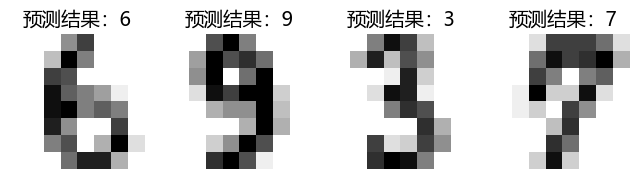

In [36]:
import matplotlib.pyplot as plt

predicted = svc_model.predict(X_test)

image_and_predictions = list(zip(images_test, predicted))

plt.figure(figsize=(8,2))
for index, (image, prediction) in enumerate(image_and_predictions[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u"预测结果：" + str(prediction), fontproperties=font_set)
plt.show()

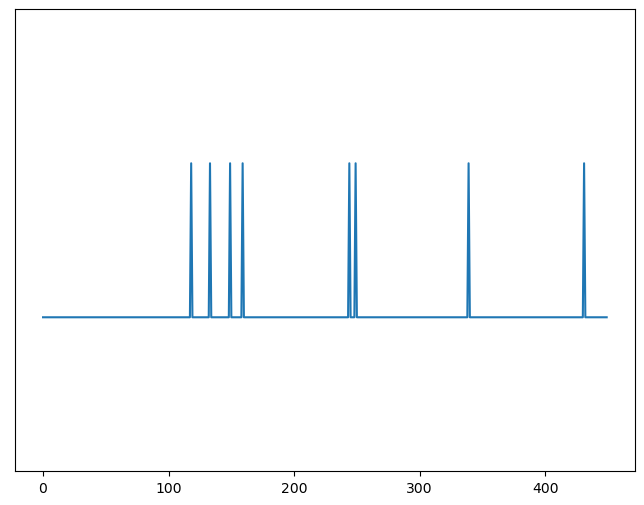

测试集数量:  450
错误识别数:  8
识别准确率:  0.9822222222222222


In [37]:
X = np.arange(len(y_test))

comp = [0 if y1 == y2 else 1 for y1, y2 in zip(y_test, predicted)]
plt.figure(figsize=(8,6))
plt.plot(X, comp)
plt.ylim(-1, 2)
plt.yticks([])
plt.show()

print("测试集数量: ", len(y_test))
print("错误识别数: ", sum(comp))
print("识别准确率: ", 1 - float(sum(comp)) / len(y_test))


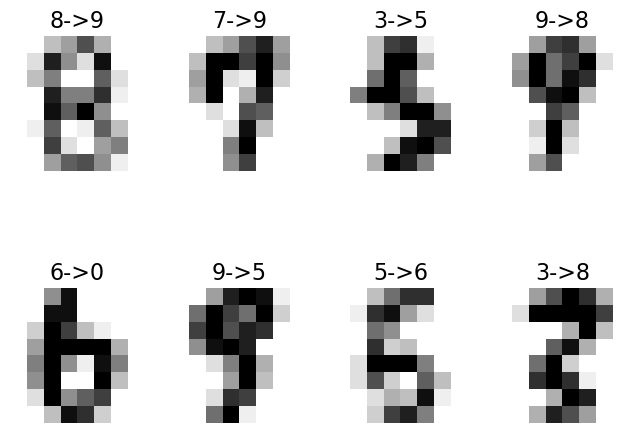

In [38]:
wrong_index = []
for i, value in enumerate(comp):
    if value: wrong_index.append(i)

plt.figure(figsize=(8,6))
for plot_index, image_index in enumerate(wrong_index):
    image = images_test[image_index]
    plt.subplot(2, 4, plot_index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    info = f"{y_test[image_index]}->{predicted[image_index]}"
    plt.title(info, fontsize=16)
plt.show()